In [75]:
import pandas as pd
import numpy as np
 
data_url = "http://lib.stat.cmu.edu/datasets/boston"
raw_df = pd.read_csv(data_url, sep="\s+", skiprows=22, header=None)
data = np.hstack([raw_df.values[::2, :], raw_df.values[1::2, :2]])
target = raw_df.values[1::2, 2]
 
X = data
y = target

<>:5: SyntaxWarning: invalid escape sequence '\s'
<>:5: SyntaxWarning: invalid escape sequence '\s'
C:\Users\emilk\AppData\Local\Temp\ipykernel_24340\2205483076.py:5: SyntaxWarning: invalid escape sequence '\s'
  raw_df = pd.read_csv(data_url, sep="\s+", skiprows=22, header=None)


In [76]:
from sklearn.model_selection import train_test_split

#1 Splitting into training and testing set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=13)

#verifying
print(X.shape[0])
print(float(X_train.shape[0]) / float(X.shape[0]))
print(float(X_test.shape[0]) / float(X.shape[0]))

506
0.7984189723320159
0.2015810276679842


Text(0.5, 1.0, 'Prices vs Predicted prices')

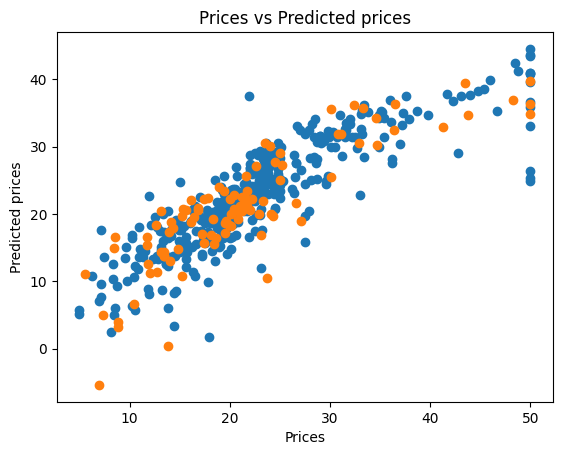

In [77]:
'''LINEAR REGRESSION'''
#2 Linear regression

from sklearn.linear_model import LinearRegression
from sklearn import linear_model
import matplotlib.pyplot as plt

regr = LinearRegression()
 
# Learning model on training data
regr.fit(X_train, y_train)
# Predicting values using test data
y_pred = regr.predict(X_test)
# Predicting values using training data
y_train_pred = regr.predict(X_train)

plt.scatter(y_train, y_train_pred)
plt.scatter(y_test, y_pred)
plt.xlabel("Prices")
plt.ylabel("Predicted prices")
plt.title("Prices vs Predicted prices")

In [78]:
#3
from sklearn.model_selection import cross_val_score

mse = np.mean((y_pred - y_test) ** 2)
print(mse)

print(regr.score(X_test, y_test))
print(regr.score(X_train, y_train))

24.31823830917039
0.7317666881184424
0.738661521750315


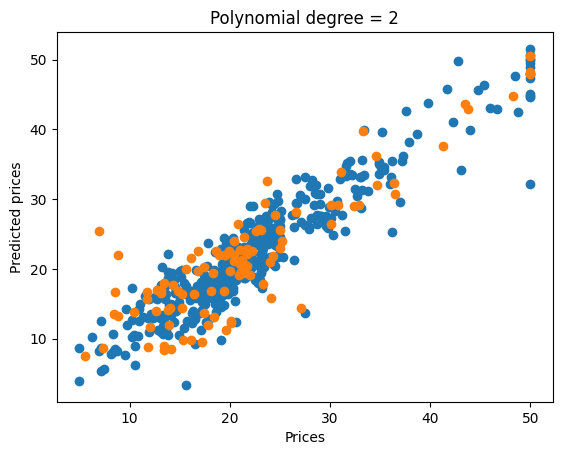

mse:  20.668620687810883
0.8720482608833777
0.7720224422249967


In [79]:
#4 Add polynomial features

from sklearn.preprocessing import PolynomialFeatures
 
polynomial_features = PolynomialFeatures(degree=2)
X_train_2 = polynomial_features.fit_transform(X_train)
X_test_2 = polynomial_features.fit_transform(X_test)

regr = LinearRegression()

# Learning model on training data
regr.fit(X_train_2, y_train)
# Predicting values using test data
y_pred = regr.predict(X_test_2)
# Predicting values using training data
y_train_pred = regr.predict(X_train_2)

plt.scatter(y_train, y_train_pred)
plt.scatter(y_test, y_pred)
plt.xlabel("Prices")
plt.ylabel("Predicted prices")
plt.title("Polynomial degree = 2")
plt.show()
mse = np.mean((y_pred - y_test) ** 2)
print('mse: ', mse)
print(regr.score(X_train_2, y_train))
print(regr.score(X_test_2, y_test))

In [80]:
#5

from sklearn.linear_model import Ridge, Lasso

alpha = [0.001, 0.01, 0.1, 1, 10]
mse_las = []
score_las = []

for a in alpha:
    las = linear_model.Lasso(alpha=a)
    las.fit(X_train_2, y_train)
    y_pred = las.predict(X_test_2)
    y_train_pred = las.predict(X_train_2)
    mse_las.append(np.mean((y_pred - y_test) ** 2))
    score_las.append(las.score(X_test_2, y_test))

D:\Github\Machine-Learning\.venv\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:678: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.466e+03, tolerance: 3.332e+00
  model = cd_fast.enet_coordinate_descent(
D:\Github\Machine-Learning\.venv\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:678: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.593e+03, tolerance: 3.332e+00
  model = cd_fast.enet_coordinate_descent(
D:\Github\Machine-Learning\.venv\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:678: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality 

<function matplotlib.pyplot.show(close=None, block=None)>

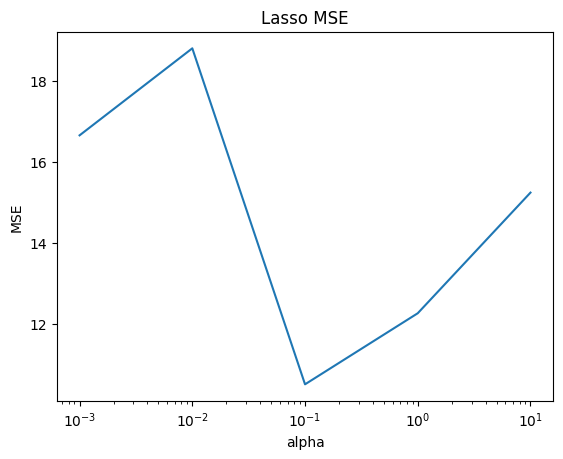

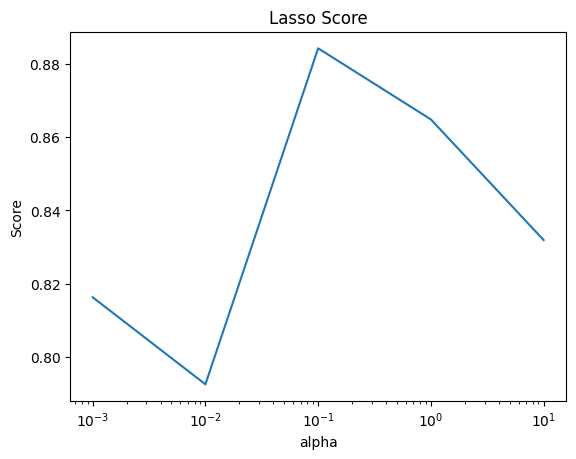

In [81]:
plt.plot(alpha, mse_las)
plt.title('Lasso MSE')
plt.xlabel('alpha')
plt.ylabel('MSE')
plt.xscale('log') 
plt.show

plt.figure()
plt.plot(alpha, score_las)
plt.title('Lasso Score')
plt.xlabel('alpha')
plt.ylabel('Score')
plt.xscale('log') 
plt.show

In [82]:
alpha = [0.001, 0.01, 0.1, 1, 10]
mse_ridg = []
score_ridg = []

for a in alpha:
    ridg = linear_model.Lasso(alpha=a)
    ridg.fit(X_train_2, y_train)
    y_pred = ridg.predict(X_test_2)
    y_train_pred = ridg.predict(X_train_2)
    mse_ridg.append(np.mean((y_pred - y_test) ** 2))
    score_ridg.append(ridg.score(X_test_2, y_test))

D:\Github\Machine-Learning\.venv\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:678: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.466e+03, tolerance: 3.332e+00
  model = cd_fast.enet_coordinate_descent(
D:\Github\Machine-Learning\.venv\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:678: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.593e+03, tolerance: 3.332e+00
  model = cd_fast.enet_coordinate_descent(
D:\Github\Machine-Learning\.venv\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:678: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality 

<function matplotlib.pyplot.show(close=None, block=None)>

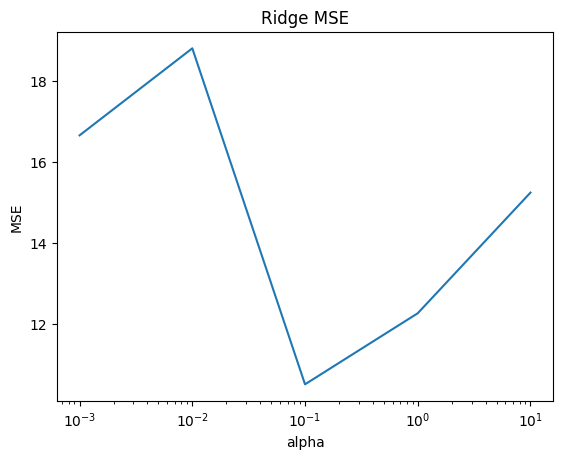

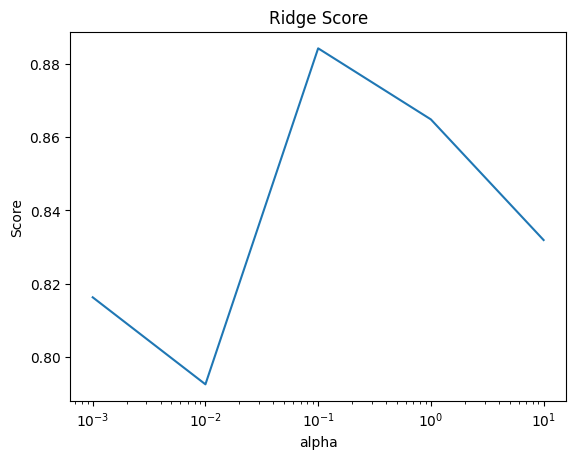

In [83]:
plt.plot(alpha, mse_ridg)
plt.title('Ridge MSE')
plt.xlabel('alpha')
plt.ylabel('MSE')
plt.xscale('log') 
plt.show

plt.figure()
plt.plot(alpha, score_ridg)
plt.title('Ridge Score')
plt.xlabel('alpha')
plt.ylabel('Score')
plt.xscale('log') 
plt.show

D:\Github\Machine-Learning\.venv\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
D:\Github\Machine-Learning\.venv\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regr

<function matplotlib.pyplot.show(close=None, block=None)>

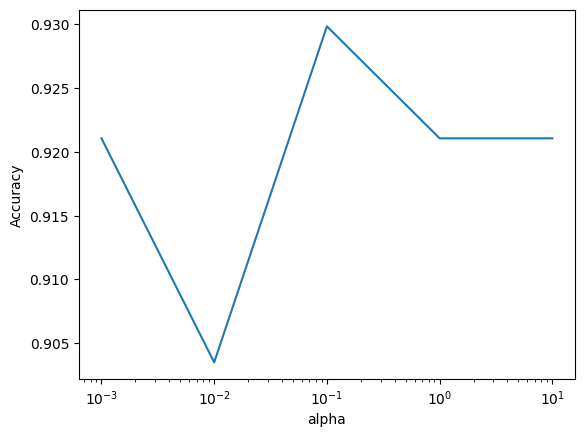

In [84]:
'''LOGISTIC REGRESSION'''

from sklearn.metrics import accuracy_score
from sklearn.datasets import load_breast_cancer
from sklearn.linear_model import LogisticRegression
data = load_breast_cancer()
 
y = data.target
X = data.data

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=13)

mse = []
score = []
accuracy = []
for a in alpha:
    model = LogisticRegression(random_state=0, penalty='l2', C=1/a).fit(X_train, y_train)
    y_pred = model.predict(X_test)
    y_train_pred = model.predict(X_train)
    mse.append(np.mean((y_pred - y_test) ** 2))
    score.append(model.score(X_test, y_test))
    accuracy.append(accuracy_score(y_test, y_pred))

plt.figure()
plt.plot(alpha, accuracy)
plt.xlabel('alpha')
plt.ylabel('Accuracy')
plt.xscale('log') 
plt.show